In [1]:
import pandas as pd
import yfinance as yf
import sqlalchemy
import datetime as dt
from pandas.tseries.offsets import MonthEnd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

style.use('ggplot')

In [2]:
# url = 'https://en.wikipedia.org/wiki/List_of_BSE_SENSEX_companies''

tickerSensex = pd.read_csv('./data/BSE_Company_List.csv')
tickerSensex = tickerSensex.Symbol.to_list()

# tickers = []
# for ticker in tickerSensex:
#     ticker = ticker.replace('.', '-')
#     tickers.append(ticker)

#tickerSensex = tickerSensex.replace('.', '-')
tickerSensex[0:5]

['ASIANPAINT.BO',
 'AXISBANK.BO',
 'BAJAJ-AUTO.BO',
 'BAJFINANCE.BO',
 'BAJAJFINSV.BO']

In [3]:
# data = []

# for ticker in tickerSensex:
#     data.append(yf.download(ticker).reset_index())

In [4]:
# engine = sqlalchemy.create_engine('sqlite:///india.db')

In [5]:
# for frame, symbol in zip(data,tickerSensex):
#     frame.to_sql(symbol, engine, index = False)

In [6]:
# pd.read_sql(f'SELECT Date, "Adj Close" AS "{tickerSensex[0]}" FROM "ASIANPAINT.BO" LIMIT(10)', engine)

# Start Here

In [7]:
df = pd.DataFrame()
engine = sqlalchemy.create_engine('sqlite:///india.db')

for ticker in tickerSensex:
    df = df.append(pd.read_sql(
        f'SELECT Date, "Adj CLose" AS "{ticker}" FROM "{ticker}" WHERE DATE > "2007-01-10"'
        ,engine))

In [8]:
df = df.groupby('Date').sum() # Resets Index to the date
df.index = pd.to_datetime(df.index) # Sets Index Dates as Datetime objects
df.head()

,ASIANPAINT.BO,AXISBANK.BO,BAJAJ-AUTO.BO,BAJFINANCE.BO,BAJAJFINSV.BO,BHARTIARTL.BO,DRREDDY.BO,HCLTECH.BO,HDFC.BO,HDFCBANK.BO,...,NTPC.BO,ONGC.BO,POWERGRID.BO,RELIANCE.BO,SBIN.BO,SUNPHARMA.BO,TCS.BO,TECHM.BO,TITAN.BO,ULTRACEMCO.BO
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-10,62.436817,81.921684,0.0,32.834297,2604.056152,266.222595,696.785522,54.860710,249.344391,90.594536,...,67.110977,87.987556,0.0,284.154999,91.023743,79.072044,234.631042,342.602234,38.810364,970.902161
2007-01-11,63.016232,85.265244,0.0,32.825546,2659.520508,276.622253,711.390808,56.545277,248.658463,90.590019,...,69.383362,90.424095,0.0,289.031067,92.072571,81.715851,242.825378,361.730499,40.264267,995.855774
2007-01-12,62.285435,88.546722,0.0,32.549824,2668.338867,288.628510,728.198120,58.951141,259.094788,96.382469,...,69.938820,91.417488,0.0,299.062317,97.953201,82.902527,251.970276,374.665344,40.818893,1001.556763
2007-01-15,67.733917,94.710587,0.0,32.904324,2666.459229,287.238922,723.839050,58.616112,260.687225,98.965973,...,69.964088,90.572350,0.0,304.541016,97.837112,84.424240,252.464645,379.213898,41.053986,1043.660522
2007-01-16,67.889595,97.841293,0.0,34.142944,2674.024658,291.125244,727.209473,59.463070,254.766754,99.342171,...,69.661110,90.923241,0.0,300.602173,96.816315,83.758240,252.455231,367.152191,41.289078,1068.286865


# Visualizing Selected Tickers

## Line Plot of Adj Close Prices

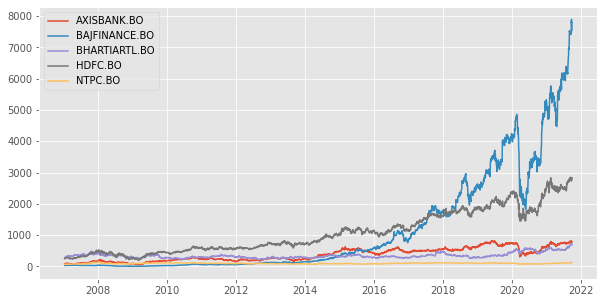

In [9]:
tickers_choice = ['AXISBANK.BO', 'BAJFINANCE.BO', 'BHARTIARTL.BO', 'HDFC.BO', 'NTPC.BO']
df_subset_vis = df[tickers_choice]

plt.figure(figsize = (10, 5))
plt.plot(df_subset_vis)
plt.legend(tickers_choice)


## Line Chart & Histogram of Percentage Change

In [10]:
df_returns = df_subset_vis.pct_change()
df_returns = df_returns.dropna()

In [11]:
np.sum(np.isinf(df_returns) == True)

AXISBANK.BO      0
BAJFINANCE.BO    1
BHARTIARTL.BO    0
HDFC.BO          0
NTPC.BO          0
dtype: int64

In [12]:
# Pulling outlier with Inf pct change
outlier_index = df_returns[np.isinf(df_returns['BAJFINANCE.BO']) == True].index
df_returns.loc[outlier_index, 'BAJFINANCE.BO'] = -1

In [13]:
# Replacing Inf with max negative pct_change so as to no lose information
np.min(df_returns)

AXISBANK.BO     -0.280145
BAJFINANCE.BO   -1.000000
BHARTIARTL.BO   -0.131822
HDFC.BO         -0.128656
NTPC.BO         -0.141515
dtype: float64

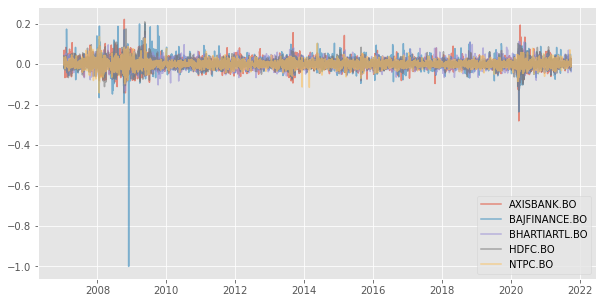

In [14]:
plt.figure(figsize = (10, 5))
plt.plot(df_returns, alpha = 0.6)
plt.legend(tickers_choice)

(-0.2, 0.2)

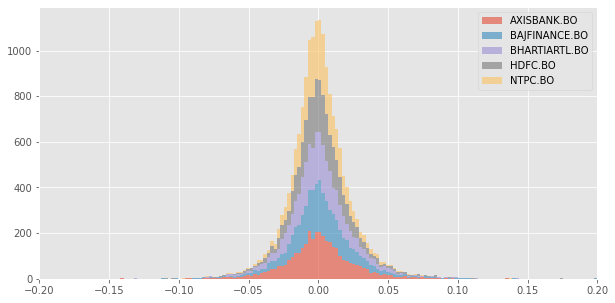

In [15]:
plt.figure(figsize = (10, 5))
plt.hist(df_returns, bins = 500, stacked = True, alpha = 0.6)
plt.legend(tickers_choice)
plt.xlim(-0.2, 0.2)

# Portfolio Optimization

In [16]:
def efficient_frontier(no_portfolios = 100, RF = 0 ):
    portfolio_returns = []
    portfolio_risk = []
    sharpe_ratio = []
    portfolio_weights = []
    #RF = 0.02
    df_returns_mean = df_returns.mean() * 252
    
    for portfolio in range(no_portfolios):
        # Generate Random Weights
        weights = np.random.random(len(tickers_choice))
        weights = np.round(weights / np.sum(weights), 3)
        portfolio_weights.append(weights)

        # Annualized Returns
        annualized_returns = np.sum(df_returns_mean * weights)
        portfolio_returns.append(annualized_returns)

        # Covariance Matrix & Portfolio Risk Calc
        matrix_covariance = df_returns.cov() * 252
        portfolio_variance = np.dot(weights.T, np.dot(matrix_covariance, weights))
        portfolio_std = np.sqrt(portfolio_variance)
        portfolio_risk.append(portfolio_std)

        # Sharpe Ratio
        sharpe = (annualized_returns - RF) / portfolio_std
        sharpe_ratio.append(sharpe)
    
    df_metrics = pd.DataFrame([np.array(portfolio_returns),
                            np.array(portfolio_risk),
                            np.array(sharpe_ratio),
                            np.array(portfolio_weights)], index = ['Returns', 'Risk', 'Sharpe_ratio', 'Weights'])

    df_metrics = df_metrics.T
    
    min_risk = df_metrics.iloc[df_metrics['Risk'].astype(float).idxmin()]

    max_return = df_metrics.iloc[df_metrics['Returns'].astype(float).idxmax()]

    max_sharpe = df_metrics.iloc[df_metrics['Sharpe_ratio'].astype(float).idxmax()]

    plt.figure(figsize = (10 ,5))
    plt.scatter(df_metrics['Risk'], df_metrics['Returns'], c = df_metrics['Sharpe_ratio'], cmap = 'magma')

    return min_risk, max_return, max_sharpe


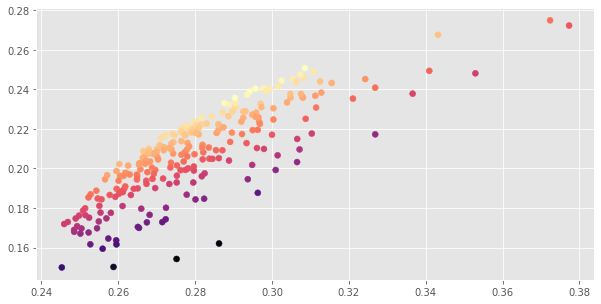

In [17]:
tmp = efficient_frontier(250, 0)

In [18]:
min_risk = pd.DataFrame({'Min Risk' : tmp[0]})
max_return = pd.DataFrame({'Max Return' : tmp[1]})
max_sharpe = pd.DataFrame({'Max Sharpe Ratio' : tmp[2]})

final_portfolios_df = pd.concat([min_risk, max_return, max_sharpe], axis = 1)

In [19]:
weights_df = pd.DataFrame(final_portfolios_df.loc['Weights'])
weights_df

,Weights
Min Risk,"[0.109, 0.035, 0.196, 0.183, 0.478]"
Max Return,"[0.42, 0.462, 0.016, 0.029, 0.073]"
Max Sharpe Ratio,"[0.124, 0.259, 0.055, 0.463, 0.099]"


In [20]:
final_portfolios_df.drop('Weights', axis = 0)

,Min Risk,Max Return,Max Sharpe Ratio
Returns,0.149926,0.274946,0.240397
Risk,0.245344,0.372379,0.295742
Sharpe_ratio,0.611086,0.73835,0.81286


In [21]:
wt_index = weights_df.index
wt_col = tickers_choice

In [22]:
tmp = []
for weight in weights_df['Weights']:
    tmp.append(str(weight).split())

tmp

[['[0.109', '0.035', '0.196', '0.183', '0.478]'],
 ['[0.42', '0.462', '0.016', '0.029', '0.073]'],
 ['[0.124', '0.259', '0.055', '0.463', '0.099]']]

In [23]:
tmp_min = (weights_df.iloc[0][0])
tmp_max = (weights_df.iloc[1][0])
tmp_sharpe = (weights_df.iloc[2][0])

tmp_port = pd.DataFrame([tmp_min, tmp_max, tmp_sharpe], columns = wt_col, index = wt_index)
tmp_port

,AXISBANK.BO,BAJFINANCE.BO,BHARTIARTL.BO,HDFC.BO,NTPC.BO
Min Risk,0.109,0.035,0.196,0.183,0.478
Max Return,0.420,0.462,0.016,0.029,0.073
Max Sharpe Ratio,0.124,0.259,0.055,0.463,0.099


In [24]:
tmp_min[0]

0.109

# Choice of Currenct using 'forex-python' package

In [25]:
from forex_python.converter import CurrencyRates
c = CurrencyRates()

In [26]:
usd_amt = 100.45
gbp_amt = 100.45
inr_amt = 100.45

In [27]:
c.convert('INR', 'USD', inr_amt)

1.3491103593578444

In [28]:
c.convert('INR', 'USD', df_subset_vis)

,AXISBANK.BO,BAJFINANCE.BO,BHARTIARTL.BO,HDFC.BO,NTPC.BO
Date,,,,,
2007-01-10,1.100263,0.440986,3.575547,3.348861,0.901345
2007-01-11,1.145169,0.440869,3.715221,3.339649,0.931865
2007-01-12,1.189241,0.437166,3.876473,3.479815,0.939325
2007-01-15,1.272026,0.441927,3.857810,3.501203,0.939664
2007-01-16,1.314074,0.458562,3.910006,3.421687,0.935595
...,...,...,...,...,...
2021-09-22,10.588737,104.634958,9.580978,36.706681,1.670775
2021-09-23,10.910401,106.068013,9.573727,37.846943,1.693607
2021-09-24,10.720357,104.683979,9.745110,38.122272,1.670103


# Fitting Distribution to Data

In [29]:
from fitter import Fitter

In [30]:
f = Fitter(data = df_returns['AXISBANK.BO'], distributions = ['norm', 't', 'nct'])

In [37]:
a = f.fit()

In [38]:
a

In [41]:
a = f.summary(plot = False, method = 'bic')

In [42]:
a

,sumsquare_error,aic,bic,kl_div
nct,16.846525,501.242297,-19400.561561,inf
t,19.501661,489.176681,-18879.096018,inf
norm,204.636131,2582.728050,-10379.984295,inf


In [46]:
param = f.fitted_param['norm']

In [47]:
param

(0.0009772990799807762, 0.02650271877448366)

In [45]:
from scipy.stats import norm,t, nct

In [76]:
data = df_returns['AXISBANK.BO']

In [78]:
np.min(data)

-0.2801447374579952

In [79]:
np.max(data)

0.22216183542921786

In [80]:
len(data)

3619

In [93]:
# distribution fitting
def distribution_fitting(data, dist = 'norm'):

    x_quantile = np.linspace(np.min(data), np.max(data), len(data))

    if dist == 'norm':
        param = f.fitted_param[dist]
        a_tmp = norm.pdf(x_quantile, loc = param[0], scale = param[1])
    
    elif dist == 't':
        param = f.fitted_param[dist]
        a_tmp = t.pdf(x_quantile, param[0], param[1], param[2])

    elif dist == 'nct':
        param = f.fitted_param[dist]
        a_tmp = nct.pdf(x_quantile, param[0], param[1], param[2], param[3])
    

    plt.hist(data, bins = 100,  density = True)
    plt.plot(x_quantile, a_tmp, color = 'black')

    return x_quantile, a_tmp
    

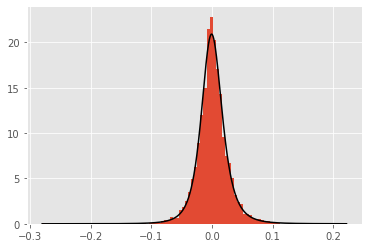

In [96]:

tmp = distribution_fitting(df_returns['AXISBANK.BO'], 'nct')

In [83]:
tmp

array([5.56393725e-24, 5.88177708e-24, 6.21760287e-24, ...,
       1.23311027e-14, 1.18040950e-14, 1.12993006e-14])